In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import scipy.stats as si
from sklearn.manifold import TSNE

path = os.getcwd()

S = 1500
rf = 0.0265

path = os.getcwd()
yields = pd.read_csv(path + '/yields.csv')
data = pd.read_csv(path + '/data.csv')
d1 = data[(data['type'] == 'C') & (data['strike'] < 1.0)]
d2 = data[(data['type'] == 'P') & (data['strike'] > 1.0)] 
data = d1.append(d2)
data = data[data['days'] < 367]
data['days'] = data['days']/365
data['strike'] = data['strike']/S
data = data[data['strike'] > 0.7]
data = data[data['strike'] < 1.3]
callput = data['type'].values
T = (data['days']).values
K = (data['strike']).values
V = data['IV'].values
P = data['price'].values
len(data)

1486

In [12]:
def option_price(S, K, T, sigma, option = 'C', r = 0.05):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option == 'C':
        return (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'P':
        return (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))

In [13]:
test = np.array([T, K, V])
test = np.nan_to_num(test)
test = test.T

X_embedded = TSNE(n_components=3).fit_transform(test)
print(1)
X_embedded1 = TSNE(n_components=3, perplexity = 100).fit_transform(test)
print(1)
X_embedded2 = TSNE(n_components=3, perplexity = 500).fit_transform(test)
print(1)
X_embedded3 = TSNE(n_components=3, perplexity = 1000).fit_transform(test)
print(1)

1
1
1
1


c:\users\user-pc\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


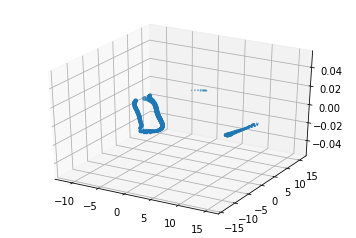

<Figure size 432x288 with 0 Axes>

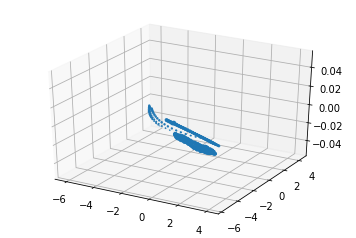

<Figure size 432x288 with 0 Axes>

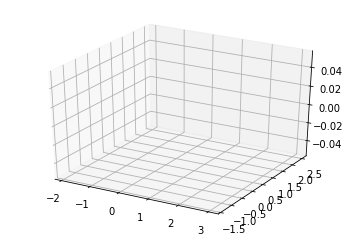

<Figure size 432x288 with 0 Axes>

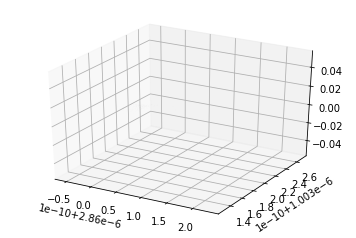

<Figure size 432x288 with 0 Axes>

In [14]:
X = np.array(X_embedded).T
X1 = np.array(X_embedded1).T
X2 = np.array(X_embedded2).T
X3 = np.array(X_embedded3).T

fig = plt.figure() 
ax = fig.gca(projection='3d')
plt.scatter(X[0], X[1], X[2])
plt.show()
plt.clf()
#, c = ['R','G','B'],cmap='RdBu')
fig = plt.figure() 
ax = fig.gca(projection='3d')
plt.scatter(X1[0], X1[1], X1[2])
plt.show()
plt.clf()

fig = plt.figure() 
ax = fig.gca(projection='3d')
plt.scatter(X2[0], X2[1], X2[2])
plt.show()
plt.clf()

fig = plt.figure() 
ax = fig.gca(projection='3d')
plt.scatter(X3[0], X3[1], X3[2])
plt.show()
plt.clf()


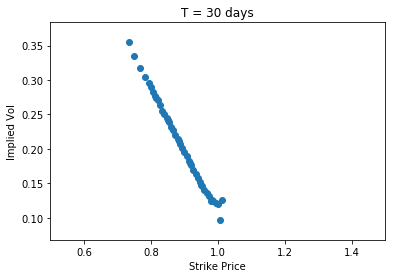

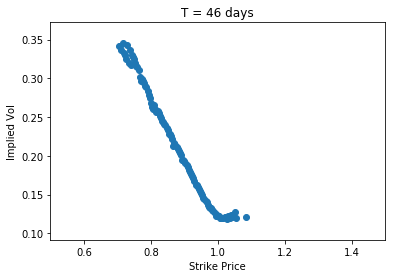

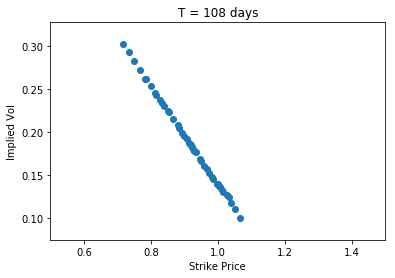

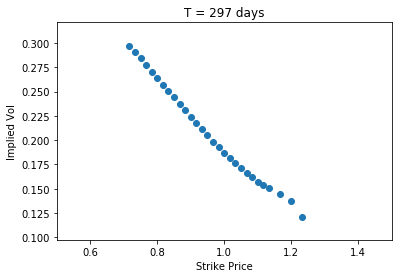

<Figure size 432x288 with 0 Axes>

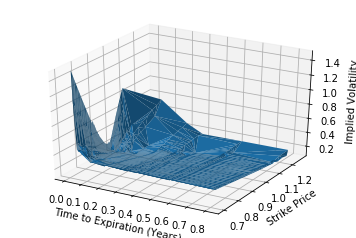

In [26]:
d = data[data['days']*365 == 30] 
plt.scatter(d['strike'].values, d['IV'].values) 
plt.title('T = 30 days') 
plt.xlabel('Strike Price') 
plt.ylabel('Implied Vol') 
plt.xlim([0.5, 1.5])
plt.show() 
plt.clf() 
d = data[data['days']*365 == 46] 
plt.scatter(d['strike'].values, d['IV'].values) 
plt.title('T = 46 days') 
plt.xlabel('Strike Price') 
plt.ylabel('Implied Vol') 
plt.xlim([0.5, 1.5])
plt.show() 
plt.clf() 
d = data[data['days']*365 == 108] 
plt.scatter(d['strike'].values, d['IV'].values) 
plt.title('T = 108 days') 
plt.xlabel('Strike Price') 
plt.ylabel('Implied Vol') 
plt.xlim([0.5, 1.5])
plt.show() 
plt.clf() 
d = data[data['days']*365 == 297] 
plt.scatter(d['strike'].values, d['IV'].values) 
plt.title('T = 297 days') 
plt.xlabel('Strike Price') 
plt.ylabel('Implied Vol') 
plt.xlim([0.5, 1.5])
plt.show() 
plt.clf() 

fig = plt.figure() 
ax = fig.gca(projection='3d')

ax.set_xlabel('Time to Expiration (Years)')
ax.set_ylabel('Strike Price')
ax.set_zlabel('Implied Volatility')
ax.plot_trisurf(T, K, V)

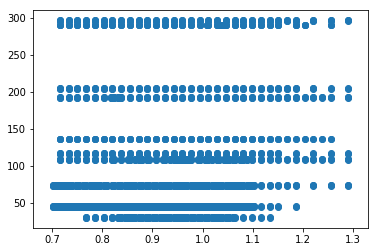

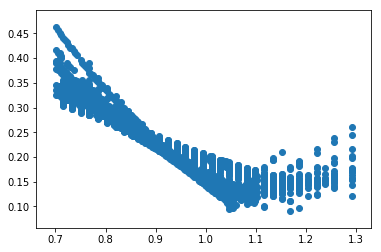

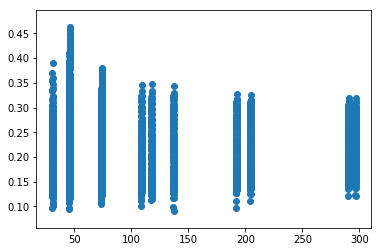

In [24]:
plt.scatter(data['strike'], data['days'])
plt.show()
plt.clf()
plt.scatter(data['strike'],data['IV'])
plt.show()
plt.clf()
plt.scatter(data['days'],data['IV'])

ModuleNotFoundError: No module named 'mayavi'